In [13]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp
from scipy.optimize import bisect, newton, fixed_point, root_scalar

# Laboratorio 04: Raíces

---
### Profesor: Juan Marcos Marín
### Nombre: Leonardo Ortega Trujillo
*Métodos computacionales 2024-II*

---

#1
¿Para que ángulo el area del segmento circular es igual a un cuarto del area de una circunferencia?

- Muestre que la expresión que permite resolver este problema será:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- Construya una grafica para $\theta$  ¿Alrededor de que punto esta solución?(Para este punto se recomienda emplear `dataframe`).

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.
------------------------------------

- A partir de el area de un segmento circular "$A_s$":
\begin{equation}
 A_s = (R^2/2) * (θ - \sin \theta)
\end{equation}

y la formula del area de una circunferencia "$A_c$":
\begin{equation}
 A_c = \pi R^2
\end{equation}

queremos encontrar cuando el $A_s$ = 1/4 $A_c$, entonces:

\begin{equation}
 A_s = A_c/4
\end{equation}

\begin{equation}
(R^2/2) * (θ - \sin \theta) = \pi R^2 /4
\end{equation}

y así concluimos que:

\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}

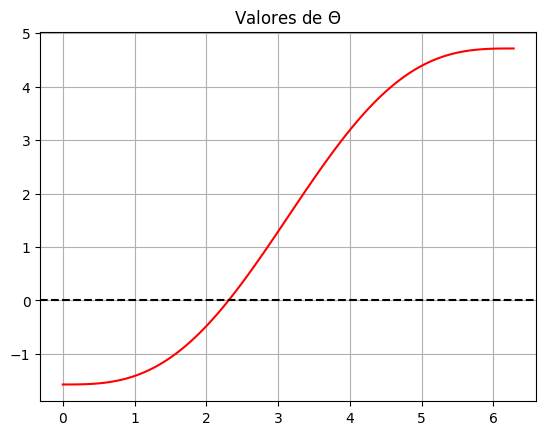

In [16]:
#Aquí va su código
theta = np.linspace(0,2*np.pi,100)

f_theta = lambda x: x - np.sin(x) - np.pi/2

plt.plot(theta,f_theta(theta), 'r-')
plt.title('Valores de $\Theta$')
plt.axhline(0, color='black', linestyle='--')
plt.grid()

In [28]:
#raíces de la función usando metodos, debemos encontrar la raíz de la función f_theta definida
##bisección:
raiz_biseccion = bisect(f_theta,2,3)
#punto fijo, usando g(x) = sen(x) + pi/2
g_theta = lambda x: np.sin(x) + np.pi/2
raiz_punto_fijo = fixed_point(g_theta,2)
#newton
raiz_newton = newton(f_theta,2)
#secante
raiz_secante = root_scalar(f_theta, method = 'secant', x0=1, x1=3)

print(f'Las raíces usando los diferentes metodos son: \n biseccion = {raiz_biseccion}\n punto fijo = {raiz_punto_fijo}\n Newton = {raiz_newton}\n secante = {raiz_secante.root}')

Las raíces usando los diferentes metodos son: 
 biseccion = 2.309881460010729
 punto fijo = 2.3098814600100575
 Newton = 2.309881460010033
 secante = 2.309881460010057


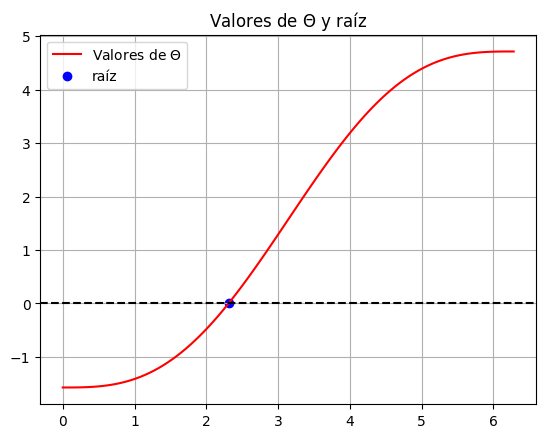

 
 Observamos la diferencia entre ambos valores es de un orden muy bajo y son aproximadamente iguales: 1.1239897901305085e-12


In [72]:
#comprobamos la solucion:
plt.plot(theta,f_theta(theta), 'r-', label = 'Valores de $\Theta$')
plt.title('Valores de $\Theta$ y raíz')
plt.scatter(raiz_biseccion,f_theta(raiz_biseccion),color = 'blue', label = 'raíz')
#plt.scatter(raiz_punto_fijo,f_theta(raiz_punto_fijo))
#plt.scatter(raiz_newton,f_theta(raiz_newton))
#plt.scatter(raiz_secante.root,f_theta(raiz_secante.root))
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.grid()
plt.show()
#todos los metodos dan una raíz igual para nuestro analisis, comprobamos que funcione el valor de theta:

h = lambda x: x - np.sin(x)
print(f' \n Observamos la diferencia entre ambos valores es de un orden muy bajo y son aproximadamente iguales: {abs(h(raiz_biseccion) - np.pi/2)}')

# 2

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$


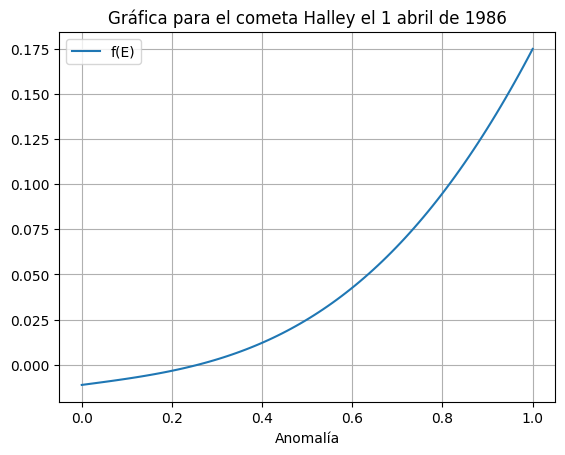

In [102]:
# Aqui va su código
e = 0.9672671
T = 75.96000
t_0 = 1986.1113
t_abril = 1986.2466 #este valor se calcula sumando 1986 + 90/365, este es el tiempo en años de esta fecha de 1 abril de 1986
M = lambda t: ((2*np.pi)/T)*(t-t_0)

def f_E(E,M):
  return E -e*np.sin(E) - M

t = np.linspace(0,1,100)
f_graf = f_E(t,M(t_abril))

plt.plot(t, f_graf, label = 'f(E)')
plt.title('Gráfica para el cometa Halley el 1 abril de 1986')
plt.xlabel('Anomalía')
plt.legend()
plt.grid()
plt.show()

In [92]:
#raíces usando metodo de Newton y secante:
E0 = 0.2  # primer punto
E1 = 0.4  # Segundo punto, esto para usar el metodo de la secante. Se eligen estos dos puntos porque a raíz de la grafica son visualmente los más cercanos a la raíz

#Newton
E_newton = newton(f_E, E0, args  = (M(t_abril),))
print("Raíz usando Newton:", E_newton)

#Secante
E_secante = root_scalar(f_E, args=(M(t_abril),), method='secant', x0=E0, x1=E1).root
print("Raíz usando Secante:", E_secante)

Raíz usando Newton: 0.25780166177143354
Raíz usando Secante: 0.25780166177169833


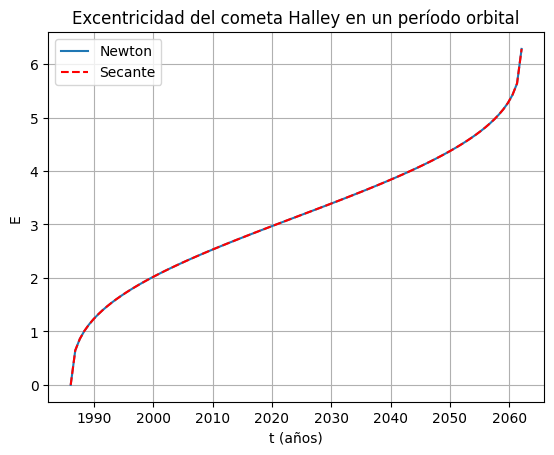

In [104]:
delta_t = T/100
t_valores = np.linspace(t_0, t_0 + T,100)

E_valores_newton = []
E_valores_secant = []
M_valores = []

for t in t_valores:
    M_t = M(t)
    M_valores.append(M_t)

    #Newton
    E_n = newton(f_E, E0, args=(M_t,))
    E_valores_newton.append(E_n)

    #Secante
    E_s = root_scalar(f_E, args=(M_t,), method='secant', x0=E0, x1=E1).root
    E_valores_secant.append(E_s)

plt.plot(t_valores, E_valores_newton, label="Newton")
plt.plot(t_valores, E_valores_secant, 'r--', label="Secante")
plt.xlabel("t (años)")
plt.ylabel("E ")
plt.legend()
plt.title("Excentricidad del cometa Halley en un período orbital")
plt.grid()
plt.show()

#3
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

* La magnetización reducida empleando el metodo de la secante y Newton-Raphson(Muestre su resultado con 4 cifras)

* Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [134]:
T = 0.5
f = lambda m: m - np.tanh(m/T)

raiz_secante_mag = root_scalar(f, method = 'secant', x0=0.5, x1=0.6) #secante
raiz_newton_mag = newton(f,2) #Newton
m = lambda m: np.tanh(m/T) #funcion para el metodo de punto fijo
raiz_punto_fijo_mag = fixed_point(m,0.5) #punto fijo

print(f'Las raíces usando metodo de secante, Newton y punto fijo respectivamente son: \n Secante = {raiz_secante_mag.root:.4f}\n Newton = {raiz_newton_mag:.4f}\n Punto fijo = {raiz_punto_fijo_mag:.4f}')

Las raíces usando metodo de secante, Newton y punto fijo respectivamente son: 
 Secante = 0.9575
 Newton = 0.9575
 Punto fijo = 0.9575


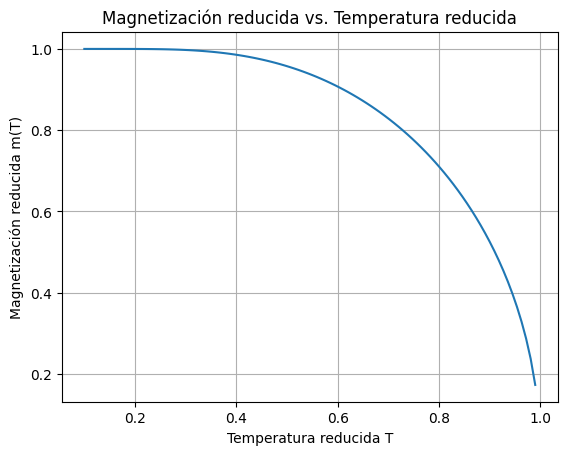

In [147]:
def g(m,T):
  return np.tanh(m/T) #funcion para la magnetizacion dependiendo de T

T = np.linspace(0.1, 0.99, 100)
magnetizacion = [fixed_point(g, x0=0.5, args=(T,)) for T in T] #puntos a graficar de la magnetizacion en funcion de T

plt.plot(T, magnetizacion, label='Magnetización vs. Temperatura')
plt.xlabel("Temperatura reducida T")
plt.ylabel("Magnetización reducida m(T)")
plt.title("Magnetización reducida vs. Temperatura reducida")
plt.grid()
plt.show()